# **Income Dataset**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix

In [ ]:
income_df = pd.read_csv("income.csv")

X_income = income_df.drop('income_level', axis=1)
y_income = income_df['income_level']

X_train_i, X_test_i, y_train_i, y_test_i = train_test_split(X_income, y_income, test_size=0.3, random_state=42)

ada_model = AdaBoostClassifier(n_estimators=10, random_state=42)
ada_model.fit(X_train_i, y_train_i)
y_pred_i = ada_model.predict(X_test_i)

print("AdaBoost Accuracy with 10 estimators:", accuracy_score(y_test_i, y_pred_i))

AdaBoost Accuracy with 10 estimators: 0.8276803384972361


Best AdaBoost Accuracy: 0.8310 with 42 estimators


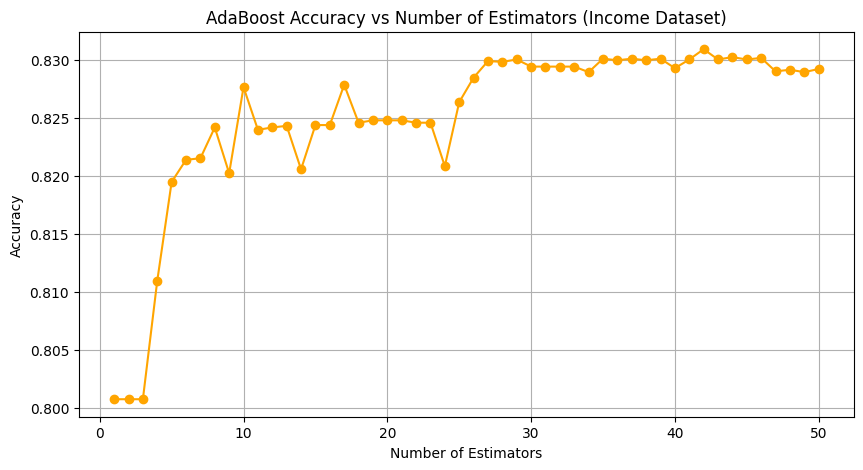

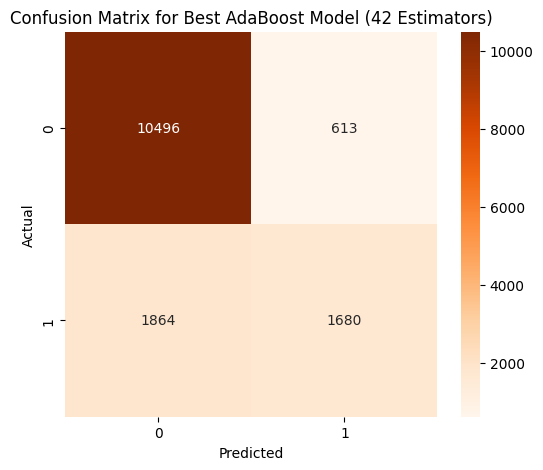

In [15]:
scores_ada = []
n_range_ada = range(1, 51)
best_model_ada = None
best_preds_ada = None

for n in n_range_ada:
    model = AdaBoostClassifier(n_estimators=n, random_state=42)
    model.fit(X_train_i, y_train_i)
    preds = model.predict(X_test_i)
    acc = accuracy_score(y_test_i, preds)
    scores_ada.append(acc)

    if acc == max(scores_ada):
        best_model_ada = model
        best_preds_ada = preds

best_score_ada = max(scores_ada)
best_n_ada = n_range_ada[scores_ada.index(best_score_ada)]

print(f"Best AdaBoost Accuracy: {best_score_ada:.4f} with {best_n_ada} estimators")

plt.figure(figsize=(10, 5))
plt.plot(n_range_ada, scores_ada, marker='o', linestyle='-', color='orange')
plt.title('AdaBoost Accuracy vs Number of Estimators (Income Dataset)')
plt.xlabel('Number of Estimators')
plt.ylabel('Accuracy')
plt.grid(True)
plt.show()

cm_ada = confusion_matrix(y_test_i, best_preds_ada)
plt.figure(figsize=(6, 5))
sns.heatmap(cm_ada, annot=True, fmt='d', cmap='Oranges', xticklabels=[0, 1], yticklabels=[0, 1])
plt.title(f"Confusion Matrix for Best AdaBoost Model ({best_n_ada} Estimators)")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()